<a href="https://colab.research.google.com/github/swapnil4549/Game-App-Reviews-Analysis/blob/main/GameAppFinalApproch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading CSV file**


In [ ]:
import pandas as pd
file_open = pd.read_csv('/content/drive/MyDrive/sentiment approch/GameAppReviews.csv')
file_open

,content,score,thumbsUpCount,at,replyContent,sortOrder,appId
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps
3,I would have something to say about the game…i...,1,3,2022-10-04 12:55:43,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
4,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
...,...,...,...,...,...,...,...
20341,Love this game. Helps me to relax.,5,0,2022-12-15 18:45:50,NaN,newest,com.king.candycrushsaga
20342,It's really enjoyed I love the game though it ...,5,0,2022-12-15 18:44:42,NaN,newest,com.king.candycrushsaga
20343,Very best game for old game,5,0,2022-12-15 18:34:34,NaN,newest,com.king.candycrushsaga
20344,Cooy fun good time great fun funcool time swee...,5,2,2022-12-15 18:23:34,NaN,newest,com.king.candycrushsaga


In [ ]:
newdf = file_open['content']
newdf = pd.DataFrame(newdf)
newdf

,content
0,When I'm able to play the game it's great but ...
1,Game crashes all the time and is basically unp...
2,This game was going great but now it's just a ...
3,I would have something to say about the game…i...
4,Good: fun movement and gameplay mechanics and ...
...,...
20341,Love this game. Helps me to relax.
20342,It's really enjoyed I love the game though it ...
20343,Very best game for old game
20344,Cooy fun good time great fun funcool time swee...


In [ ]:
newdf['content'][0]

"When I'm able to play the game it's great but it crashes on me way to often. It literally crashed and closed out 6 times in a row while I was in a middle of a match. I have on the lowest graphics possible and it still does it. I would really to give this more stars but I can't because it consistently keeps crashing. Update: I've still been trying to play but its still very unstable. Crashes a lot."

## **Text Preprocessing**

In [ ]:
newdf['content'] = newdf['content'].str.lower()

In [ ]:
import string
exclude = string.punctuation

In [ ]:
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [ ]:
text = "when i'm able to play the game it's great but it crashes on me way to often. it literally crashed and closed out 6 times in a row while i was in a middle of a match. i have on the lowest graphics possible and it still does it. i would really to give this more stars but i can't because it consistently keeps crashing. update: i've still been trying to play but its still very unstable. crashes a lot."
newtext = remove_punc(text)
newtext

'when im able to play the game its great but it crashes on me way to often it literally crashed and closed out 6 times in a row while i was in a middle of a match i have on the lowest graphics possible and it still does it i would really to give this more stars but i cant because it consistently keeps crashing update ive still been trying to play but its still very unstable crashes a lot'

In [ ]:
newdf['content'] = newdf['content'].apply(remove_punc)
newdf

,content
0,when im able to play the game its great but it...
1,game crashes all the time and is basically unp...
2,this game was going great but now its just a c...
3,i would have something to say about the game…i...
4,good fun movement and gameplay mechanics and g...
...,...
20341,love this game helps me to relax
20342,its really enjoyed i love the game though it a...
20343,very best game for old game
20344,cooy fun good time great fun funcool time swee...


## **Miss spell correction**

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
newdf['content'][4]

'good fun movement and gameplay mechanics and gunplay bad sbmmlive opponent gameplay kicks in far too strong after just a few matches throwing you to the wolves so to speak optimization for even mid tier devices is non existent even with an 8core processor and 4 gb ram im having significant stuttering and frame rate drops that either crash the application or cause it to become unplayable even with frame rate settings and graphics set to the lowest edit frame rate still horrible'

In [ ]:
from autocorrect import Speller
spell = Speller(fast=True)

In [ ]:
corrected = spell('we are not ofen save the treeee ')
corrected

'we are not often save the treeee '

In [ ]:
# !pip install textblob

In [ ]:
def spellcheck(text):
  data = spell(text)
  return data


In [ ]:
# co = spellcheck('we are not ofen save the treeee ')
# co

In [ ]:
newdf['content'] = newdf['content'].apply(spellcheck)
newdf

,content
0,when im able to play the game its great but it...
1,game crashes all the time and is basically unp...
2,this game was going great but now its just a c...
3,i would have something to say about the game…i...
4,good fun movement and gameplay mechanics and g...
...,...
20341,love this game helps me to relax
20342,its really enjoyed i love the game though it a...
20343,very best game for old game
20344,copy fun good time great fun funcool time swee...


# **Removing Stop words and Stemming**

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
newdf['content'] = newdf['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
newdf

,content
0,im able play game great crashes way often lite...
1,game crashes time basically unplayable even th...
2,game going great complete mess literally chang...
3,would something say game…if didnt crash multip...
4,good fun movement gameplay mechanics gunplay b...
...,...
20341,love game helps relax
20342,really enjoyed love game though times gardens
20343,best game old game
20344,copy fun good time great fun funcool time swee...


In [ ]:
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer("english")

## **Text Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
content_list = newdf['content']
text_tokenize = []
for i in range(len(content_list)):
  token = word_tokenize(content_list[i])
  filtered_text = [snow_stemmer.stem(t) for t in token]
  text_tokenize.append(filtered_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(text_tokenize)

20346

In [ ]:
text_tokenize[0]

['im',
 'abl',
 'play',
 'game',
 'great',
 'crash',
 'way',
 'often',
 'liter',
 'crash',
 'close',
 '6',
 'time',
 'row',
 'middl',
 'match',
 'lowest',
 'graphic',
 'possibl',
 'still',
 'would',
 'realli',
 'give',
 'star',
 'cant',
 'consist',
 'keep',
 'crash',
 'updat',
 'ive',
 'still',
 'tri',
 'play',
 'still',
 'unstabl',
 'crash',
 'lot']

# **Human Values Dictionary**

In [ ]:
dict_value = {'Freedom': ['a free hand', 'abandon', 'ability', 'autarchy', 'autonomy', 'blank cheque', 'boldness', 'brazenness', 'candour', 'carte blanche', 'casualness', 'deliverance', 'democracy', 'directness', 'discharge', 'discretion', 'disrespect', 'ease', 'elbowroom', 'emancipation', 'entitlement', 'exemption', 'facility', 'familiarity', 'flexibility', 'forwardness', 'frankness', 'home rule', 'immunity', 'impertinence', 'impunity', 'independence', 'informality', 'ingenuousness', 'latitude', 'laxity', 'leeway', 'liberty', 'licence', 'manumission', 'naturalness', 'openness', 'opportunity', 'overfamiliarity', 'play', 'power', 'prerogative', 'presumption', 'privilege', 'rangatiratanga', 'range', 'release', 'relief', 'right', 'scope', 'self-determination', 'self-government', 'sovereignty', 'unconstraint', 'unfree', 'disenfranchisement', 'independent', 'dependent', 'defeat', 'bound', 'restricted', 'restrained'],
'Creativity': ['creativity', 'cleverness', 'fecundity', 'fertility', 'imagination', 'imaginativeness', 'ingenuity', 'inspiration', 'inventiveness', 'originality', 'productivity', 'talent', 'uncreative', 'inability', 'uncreativeness', 'convergent thinking'],
'Independence': ['autarchy', 'autonomy', 'detachment', 'disinterest', 'disinterestedness', 'dispassion', 'even-handedness', 'fairness', 'freedom', 'home rule', 'impartiality', 'liberty', 'neutrality', 'nonpartisanship', 'objectivity', 'open-mindedness', 'rangatiratanga', 'self-determination', 'self-government', 'self-reliance', 'self-rule', 'self-sufficiency', 'separation', 'sovereignty', 'dependent', 'susceptibility', 'sameness', 'same', 'free', 'unfree'],
'Privacy': ['privacy','clandestineness', 'concealment', 'confidentiality', 'isolation', 'privateness', 'retirement', 'retreat', 'seclusion', 'secrecy', 'separateness', 'sequestration', 'solitude', 'show', 'inactivity', 'communicativeness', 'involvement', 'engagement', 'participation'],
'Choosing own goals': ['a clean sheet','aggregate','all','all square','assist','attack','blast','bury','chalk something up','concede','cushion','down','accident','mishap','calamity'
,'catastrophe','a chapter of accidents','whoops','disaster'],
'Curiosity': ['bibelot', 'bygone', 'collector´s item', 'curio', 'freak', 'infomania', 'inquisitiveness', 'interest', 'knick-knack', 'marvel', 'nosiness', 'novelty', 'objet d´art', 'oddity', 'phenomenon', 'prying', 'rarity', 'sight', 'spectacle', 'trinket', 'wonder', 'unconsciousness', 'inwardness', 'certainty', 'consciousness', 'approve', 'abundance', 'familiarity', 'undue'],
'Self respect': ['amour-propre', 'dignity', 'morale', 'pride', 'self-esteem', 'venial sin', 'dissatisfaction', 'humble', 'meekness', 'spiritualize', 'enjoy', 'suffer', 'importance', 'disrespect', 'look down on', 'overvalue', 'Anglophobia', 'dishonor', 'underestimate', 'undervalue', 'overestimate', 'unimportance', 'worthlessness', 'criticize', 'lightness', 'misogyny', 'dislike', 'inattention', 'multiply', 'integrate', 'add', 'subtract', 'esteem', 'exclude', 'stranger', 'introvert', 'withholder', 'adult', 'loser', 'unemotional person', 'worker'],
'Excitement in life': ['boring', 'adventure' ,'buzz','commotion','confusion','drama','elation','emotion','feeling','frenzy','furor','fuss','hysteria','motivation','passion','rage','thrill','trepidation','tumult'
,'turmoil','warmth','action','activity','ado','agitation','animation','bother','discomposure','disturbance','dither','excitation','ferment','fever','flurry','heat','hubbub','hullabaloo','hurry','impulse'
,'instigation','intoxication','kicks','melodrama','motive','movement','perturbation','provocation','stimulation','stimulus','stir','titillation','to-do','urge' ,'wildness','calm','calmness'
,'depression','happiness','order','peace','stillness','cessation','discouragement','frigidity','hate','hindrance','idleness','inaction','inactivity','inertia','quiet','rest','stoppage','apathy'
,'boredom','dullness','lull'],
'A varied life': ['assorted','eclectic','heterogeneous', 'indiscriminate', 'kitchen-sink', 'magpie', 'miscellaneous', 'mixed', 'motley', 'patchwork', 'piebald','promiscuous','raggle-taggle'
,'ragtag','homogeneous','diverse','various','different','conglomerate','separate','discrete','heterogeneous','indiscriminate','miscellaneous','multifarious','sundry','like','same'
,'similar','uniform','unvaried'],
'Daring': ['adventurous', 'audacious', 'audacity', 'balls', 'ballsiness', 'ballsy', 'bold', 'boldness', 'bottle', 'brave', 'bravery', 'challenge', 'courage', 'daredevil', 'defy', 'derring-do', 'face', 'fearless', 'fearlessness', 'goad', 'grit', 'guts', 'have-a-go', 'impulsive', 'intrepid', 'intrepidity', 'nerve', 'pluck', 'plucky', 'presume', 'provoke', 'rash', 'rashness', 'reckless', 'spirit', 'spunk', 'taunt', 'temerity', 'throw down the gauntlet', 'valiant', 'venture', 'venturesome', 'inconspicuousness', 'cowardice', 'gutlessness', 'fear', 'ashamed', 'cautious', 'timidity', 'fearfulness', 'backward', 'gradual', 'afraid', 'cowardly'],
'Pleasure': ['amusement', 'beer and skittles', 'bliss', 'choice', 'contentment', 'delectation', 'delight', 'desire', 'diversion', 'enjoyment', 'gladness', 'gratification', 'happiness', 'inclination', 'jollies', 'joy', 'mind', 'option', 'preference', 'recreation', 'satisfaction', 'solace', 'will', 'wish', 'pain', 'fear', 'happiness', 'levity', 'pleasure principle', 'yang', 'yin', 'gratitude', 'ingratitude', 'despair', 'humility', 'liking', 'concern', 'hope', 'gravity', 'disenchant', 'dislike', 'displease', 'sadness'],
'Self-indulgent': ['greedy','restrained','hedonistic','decadent','effete','miserly','parsimonious','sybaritic','abstemious','excessive', 'extravagant', 'immoderate', 'intemperate', 'lavish', 'abstemious', 'discontentment', 'nonpayment', 'letdown', 'boredom', 'joint', 'unfree', 'nonworker', 'uncertain', 'sure', 'unsure', 'uncertainty', 'venial sin', 'dissatisfaction', 'humble', 'depressing', 'heterosexual', 'bisexual', 'nonindulgent', 'joyless', 'colourless', 'colorless', 'stranger', 'introvert', 'withholder', 'adult', 'loser', 'unemotional person', 'worker'],

'Enjoying life': ['enjoy','comfortable','appropriate','complacent','convenient','cozy','easy','enjoyable','happy','healthy','loose','pleasant','pleased','relaxed','satisfying','serene','snug'
,'soft','useful','warm','adequate','agreeable','at rest','cared for','cheerful','contented','delightful','gratified','hale','hearty','loose-fitting','made well','protected','relaxing'
,'relieved','rested','restful','restored','satisfactory','sheltered','snug as a bug in a rug','soothed','strengthened','untroubled','well-off','cold','cool','disagreeable','dissatisfied','hard'
,'strict','troubled','uncomfortable','unfriendly','unhappy','unpleasant','unsuited','destitute','discontented','hopeless','miserable','needy','neglected','pitiable','poor','upset','wretched'
,'amusement','fun','gratification','happiness','indulgence','joy','luxury','pleasure','recreation','relaxation','satisfaction','thrill','delectation','diversion','entertainment','fruition'
,'gladness','gusto','hedonism','rejoicing','relish','savor','self-indulgence','sensuality','triumph','zest','loving','depression','dissatisfaction','gloom','labor','pain','sadness','sorrow'
,'unhappiness','woe','work','apathy','chore','failure','task','displeasure','lack','misery','need','want'],

'Ambitious': ['active', 'adventurous', 'arduous', 'aspiring', 'avid', 'bold', 'challenging', 'daring', 'demanding', 'desirous', 'difficult', 'eager', 'elaborate', 'energetic', 'enterprising', 'enthusiastic', 'exacting', 'exhausting', 'formidable', 'grandiose', 'hard', 'hopeful', 'impressive', 'industrious', 'intent', 'intrepid', 'keen', 'pretentious', 'purposeful', 'resourceful', 'severe', 'spirited', 'strenuous', 'striving', 'taxing', 'tough', 'trying', 'vigorous', 'zealous', 'unambitious', 'voluntary', 'unmotivated', 'unneurotic', 'undesirous', 'undetermined', 'unsettled'],
'Influential': ['authoritative', 'controlling', 'crucial', 'effective', 'efficacious', 'forcible', 'guiding', 'important', 'inspiring', 'instrumental', 'leading', 'meaningful', 'momentous', 'moving', 'persuasive', 'potent', 'powerful', 'prestigious', 'significant', 'strong', 'telling', 'weighty', 'ineffective', 'powerlessness', 'impotent', 'powerless'],
'Capable': ['able', 'accomplished', 'adapted', 'adept', 'adequate', 'apt', 'clever', 'competent', 'efficient', 'experienced', 'fitted', 'gifted', 'intelligent', 'masterly', 'proficient', 'qualified', 'skilful', 'suited', 'talented', 'incapable', 'incapability', 'incompetent', 'incapacity', 'imperfectibility', 'unsusceptibility', 'impossibility', 'unqualified', 'unskilled', 'inefficient', 'inability', 'inaptitude', 'perfectibility'],
'Successful': ['acknowledged', 'at the top of the tree', 'booming', 'buoyant', 'effective', 'efficacious', 'efficient', 'eminent', 'favourable', 'flourishing', 'fortunate', 'fruitful', 'lucky', 'lucrative', 'on a roll', 'paying', 'productive', 'profit-making', 'profitable', 'prosperous', 'rewarding', 'thriving', 'top', 'triumphant', 'unbeaten', 'victorious', 'wealthy', 'defeated', 'unsuccessful', 'unproductive', 'failure'],
'Intelligent': ['acute', 'alert', 'apt', 'astute', 'automated', 'automatic', 'brainy', 'bright', 'clever', 'cognitive', 'discerning', 'enlightened', 'knowing', 'knowledgeable', 'penetrating', 'perspicacious', 'quick', 'quick-witted', 'rational', 'robotic', 'sagacious', 'self-regulating', 'sharp', 'smart', 'thinking', 'well-informed', 'stupidity', 'unintelligent', 'retarded', 'inability', 'nonexploratory', 'disinclined', 'unhurried', 'unexcitable', 'late', 'uninquiring', 'unacquisitive', 'inactive', 'slow'],
'Wealth': ['abundance', 'affluence', 'assets', 'big bucks', 'big money', 'bounty', 'capital', 'cash', 'copiousness', 'cornucopia', 'estate', 'fortune', 'fullness', 'funds', 'goods', 'lucre', 'means', 'money', 'opulence', 'pelf', 'plenitude', 'plenty', 'possessions', 'profusion', 'property', 'prosperity', 'resources', 'riches', 'richness', 'store', 'substance', 'top dollar', 'wonga', 'achromatic', 'nonmetallic', 'solvability', 'isotropy', 'tight money', 'solvency', 'insolvency', 'meager', 'ample', 'insufficiency', 'hate', 'poor', 'easy money', 'fruitlessness', 'inexpensiveness'],
'Authority': ['ace', 'administration', 'approval', 'arbiter', 'ascendancy', 'assent', 'authorization', 'Big Brother', 'boffin', 'buff', 'carte blanche', 'charge', 'command', 'connoisseur', 'consent', 'control', 'direction', 'dispensation', 'domination', 'dominion', 'expert', 'force', 'fundi', 'go-ahead', 'government', 'grasp', 'green light', 'guru', 'hotshot', 'influence', 'jurisdiction', 'justification', 'leave', 'liberty', 'licence', 'mana', 'management', 'master', 'mastery', 'might', 'officialdom', 'permission', 'permit', 'police', 'power', 'prerogative', 'privilege', 'professional', 'right', 'rule', 'sanction', 'say-so', 'scholar', 'specialist', 'strength', 'sufferance', 'supremacy', 'sway', 'the Establishment', 'the system', 'tolerance', 'virtuoso', 'warrant', 'weight', 'whizz', 'wizard', 'introvert', 'withholder', 'male', 'adult', 'creditor', 'female', 'juvenile', 'fat person', 'leader', 'member', 'good guy', 'smoker', 'uncertain', 'sure', 'unsure', 'uncertainty', 'receptor', 'inactivity', 'inactiveness', 'inaction', 'debtor', 'nonreligious person', 'follower', 'bad guy', 'unemotional person', 'worker'],

'Preserving my public image': ['character','credit','distinction','eminence','esteem','fame','honour','name','renown','repute','standing','stature','reputable','dishonor','disrepute'
,'infamy','respectable','honorable','reject','disrespect','refuse','reputation'],
'Recognition': ['acceptance', 'acclaim', 'accreditation', 'acknowledgment', 'admission', 'allowance', 'applause', 'appreciation', 'approval', 'avowal', 'awareness', 'certification', 'concession', 'confession', 'detection', 'discovery', 'endorsement', 'gratitude', 'honour', 'identification', 'perception', 'ratification', 'realization', 'recall', 'recollection', 'remembrance', 'salute', 'understanding', 'validation', 'unacknowledged', 'rejection', 'questionable', 'unpermissiveness', 'disapprobation', 'dislike', 'dishonor', 'criticize', 'tasteful', 'tasteless', 'folly', 'imprudence', 'volatile storage', 'software', 'non-volatile storage', 'nonvolatile storage', 'distrust', 'debit', 'cash', 'nonpayment', 'judiciousness', 'injudiciousness', 'unperceptive', 'known', 'unknown'],

'National security': ['assurance','asylum','backing','certainty','collateral','comfort','confidence','conviction','cover','custody','defence','gage','guarantee','happiness','hostage'
,'immunity','insurance','pawn','peace of mind','pledge','positiveness','preservation','protection','refuge','reliance','retreat','safekeeping','safety'
,'sanctuary','sureness','surety','surveillance','unassailability','insecureness','danger','war','disorder','income','unfasten','dislodge','nonpayment','fear'
,'unconnectedness','taxable','overstock','understock','irregular','disrepute','take','movableness','looseness','movability','listed security','increase'
,'divest','inactivity','insincere','frivolous','purposeless','secured bond','unsecured bond','incommutable','inconvertible','unadaptable','repulsion','detach'],

'Family security': ['ainga','domestic','domiciliary','family','family circle','home','house','child','parent','natural object','artifact','accomplice','ally','associate','bedfellow','better half'
,'bidie-in','collaborator','colleague','companion','comrade','confederate','consort','copartner','helpmate','mate','participant','significant other','spouse'
,'squeeze','team-mate','husband','separation','man','stranger','ancestor','descendant','unconnectedness','connectedness','withholder','male','adult','loser'
,'disproportionate','waste','endogamy','exogamy','unemotional person','worker'],

'Sense of belonging': ['anti-Semitism','bigotry','chauvinism','intolerance','racial discrimination','racialism','xenophobia','curve','parallel','perpendicular','advantage','accoutrements'
,'effects','gear','goods','goods and chattels','paraphernalia','personal property','possessions','property','stuff','things','active trust','passive trust'
,'mistrust','distrust'],

'Social order': ['rankings','league table', 'premier'],
'Healthy': ['anxiety','active', 'alive and kicking', 'beneficial', 'blooming', 'bracing', 'fighting fit', 'fit', 'fit as a fiddle', 'flourishing', 'hale', 'hardy', 'health-giving', 'healthful', 'hearty', 'hygienic', 'invigorating', 'nourishing', 'nutritious', 'right as rain', 'robust', 'salubrious', 'salutary', 'sound', 'strong', 'sturdy', 'vigorous', 'well', 'wholesome', 'unhealthy', 'unfit', 'unwellness', 'frail', 'unwholesome', 'illness', 'unhealthful', 'import', 'natural object', 'evil', 'immoral', 'achromatic', 'disobedient', 'bad', 'worse', 'unfavorable', 'unrespectable', 'worst', 'export'],
'Clean': ['antiseptic', 'bath', 'chaste', 'cleanse', 'complete', 'conclusive', 'decent', 'decisive', 'deep clean', 'delicate', 'deodorize', 'disinfect', 'do up', 'dust', 'elegant', 'entire', 'exemplary', 'faultless', 'final', 'flawless', 'fresh', 'good', 'graceful', 'honourable', 'hygienic', 'immaculate', 'impeccable', 'innocent', 'launder', 'lave', 'mop', 'moral', 'natural', 'neat', 'perfect', 'pure', 'purified', 'purify', 'respectable', 'rinse', 'sanitary', 'sanitize', 'scour', 'scrub', 'simple', 'sponge', 'spotless', 'squeaky-clean', 'sterile', 'swab', 'sweep', 'thorough', 'tidy', 'total', 'trim', 'unadulterated', 'unblemished', 'uncluttered', 'uncontaminated', 'undefiled', 'unimpaired', 'unpolluted', 'unsoiled', 'unspotted', 'unstained', 'unsullied', 'upright', 'vacuum', 'virtuous', 'wash', 'whole', 'wipe', 'dirty', 'dirtiness', 'septic', 'handwash', 'infect', 'demagnetise', 'simplify', 'decrease', 'awaken', 'deoxidize', 'nationalize', 'dehumanize', 'magnetise', 'naturalize', 'mythologize', 'dull', 'sharpen', 'decentralize', 'denaturalize', 'empty', 'cause to sleep', 'personalise', 'discolor', 'accelerate', 'tune', 'denazify', 'de-iodinate', 'dry', 'thin', 'heat', 'nationalise', 'desensitize', 'validate', 'qualify'],

'Obedient': ['accommodating', 'acquiescent', 'amenable', 'biddable', 'compliant', 'deferential', 'docile', 'duteous', 'dutiful', 'ingratiating', 'law-abiding', 'malleable', 'meek', 'obeisant', 'obsequious', 'passive', 'pliant', 'respectful', 'submissive', 'subservient', 'tractable', 'unresisting', 'well-trained', 'yielding', 'bad', 'disobedience', 'domineering', 'intractable', 'defiant', 'stubborn', 'unmanageable'],
'Self discipline': ['determination', 'drive', 'grit', 'resolution', 'resolve', 'self-control', 'single-mindedness', 'willpower', 'intemperance', 'unskillfulness', 'trait', 'indulgence', 'discontentment', 'nonpayment', 'letdown', 'boredom', 'joint', 'unfree', 'nonworker', 'activity', 'action', 'activeness', 'attack', 'reduced instruction set computer', 'RISC', 'indiscipline', 'unaffected', 'complex instruction set computing', 'reduced instruction set computing', 'differentiate', 'dedifferentiate', 'stay', 'worsen', 'classicism', 'minor', 'minority', 'stranger', 'introvert', 'withholder', 'adult', 'loser', 'unemotional person', 'worker'],
'Politeness': ['civility', 'complaisance', 'correctness', 'courteousness', 'courtesy', 'decency', 'deference', 'etiquette', 'grace', 'graciousness', 'mannerliness', 'obligingness', 'respectfulness', 'polite', 'discourtesy', 'impoliteness', 'discourteous', 'incivility', 'civil', 'ungraciousness', 'courteous'],
'Respect for tradition': ['attitude','belief','culture','ethic','heritage','idea','law','myth','mythology','practice','ritual','convention','custom','customs','folklore','habit','institution'
,'lore','method','movement','praxis','ritual','style','tikanga','unwritten law','unbelief','approval','disapproval','inactivity','undress','nondevelopment','ready-made'],

'Devout': ['ardent', 'deep', 'devoted', 'dinkum', 'earnest', 'fervent', 'genuine', 'godly', 'heartfelt', 'holy', 'intense', 'orthodox', 'passionate', 'pious', 'prayerful', 'profound', 'pure', 'religious', 'reverent', 'saintly', 'serious', 'sincere', 'zealous', 'frivolous', 'purposeless', 'unreal', 'disingenuous', 'insincerity', 'counterfeit'],
'Detachment': ['aloofness', 'body', 'coolness', 'detail', 'disconnection', 'disengagement', 'disinterestedness', 'fairness', 'force', 'impartiality', 'indifference', 'neutrality', 'nonchalance', 'nonpartisanship', 'objectivity', 'party', 'patrol', 'remoteness', 'separation', 'squad', 'task force', 'unconcern', 'unit', 'decrease', 'increase', 'connectedness', 'joint', 'association', 'integration', 'keep', 'respect', 'deconcentrate', 'destabilize', 'enable', 'loosen', 'deceleration', 'death', 'tightening', 'loosening'],
'Humble': ['abase', 'abash', 'break', 'bring down', 'chagrin', 'chasten', 'common', 'commonplace', 'courteous', 'crush', 'debase', 'deferential', 'degrade', 'demean', 'disgrace', 'humiliate', 'insignificant', 'low', 'lower', 'lowly', 'mean', 'meek', 'modest', 'mortify', 'obliging', 'obscure', 'obsequious', 'ordinary', 'plebeian', 'polite', 'poor', 'put down', 'reduce', 'respectful', 'self-effacing', 'servile', 'shame', 'simple', 'sink', 'subdue', 'submissive', 'subservient', 'unassuming', 'undistinguished', 'unimportant', 'unostentatious', 'unpretentious', 'stand', 'sit', 'leave', 'better', 'respect', 'consume', 'good health', 'pleasure', 'immodest', 'conceit', 'raise', 'ascend', 'flatter', 'lose', 'decompression', 'hate', 'rise', 'punch out', 'clock out', 'humanize', 'uncoiled', 'benevolence', 'enrich'],
'Moderate': ['abate', 'acceptable', 'arbitrate', 'average', 'calm', 'chair', 'control', 'controlled', 'cool', 'curb', 'decrease', 'deliberate', 'diminish', 'ease', 'equable', 'fair', 'fair to middling', 'fairish', 'half-pie', 'indifferent', 'judge', 'judicious', 'lessen', 'limited', 'mediate', 'mediocre', 'medium', 'middle-of-the-road', 'middling', 'mild', 'mitigate', 'modest', 'modulate', 'ordinary', 'pacify', 'passable', 'peaceable', 'play down', 'preside', 'quiet', 'reasonable', 'referee', 'regulate', 'relax', 'repress', 'restrain', 'restrained', 'so-so', 'sober', 'soft-pedal', 'soften', 'steady', 'subdue', 'take the chair', 'tame', 'temper', 'temperate', 'tone down', 'unexceptional', 'wane', 'within limits', 'intemperate', 'immoderate', 'intense', 'powerlessness', 'louden', 'inactivity', 'unbridle', 'encourage', 'lose', 'attack', 'refrain', 'act', 'intemperance', 'unskillfulness', 'consume', 'enable', 'disqualify', 'walk', 'allow', 'unfreeze', 'disagree', 'let go of', 'defy', 'surrender', 'unrestraint', 'indiscipline', 'free', 'break', 'resist', 'deny', 'obey', 'discontinue', 'admit', 'let'],
'Helpful': ['accommodating', 'advantageous', 'beneficent', 'beneficial', 'benevolent', 'caring', 'considerate', 'constructive', 'cooperative', 'expedient', 'favourable', 'friendly', 'kind', 'neighbourly', 'practical', 'productive', 'profitable', 'serviceable', 'supportive', 'sympathetic', 'useful', 'unhelpful', 'useless', 'uncooperative', 'unaccommodating'], 'Responsible': ['accountable', 'adult', 'amenable', 'answerable', 'at fault', 'authoritative', 'behind', 'bound', 'chargeable', 'conscientious', 'culpable', 'decision-making', 'dependable', 'duty-bound', 'executive', 'guilty', 'high', 'important', 'in charge', 'level-headed', 'liable', 'mature', 'rational', 'reliable', 'sensible', 'sober', 'sound', 'stable', 'subject', 'trustworthy', 'untrustworthy', 'unobligated', 'imprudent', 'irresponsibleness', 'irresponsible', 'unsusceptible', 'unlikely', 'exempt', 'unreliableness', 'untrustiness'], 'Forgiving': ['absolve', 'acquit', 'bury the hatchet', 'clement', 'compassionate', 'condone', 'excuse', 'exonerate', 'forbearing', 'gracious', 'humane', 'lenient', 'let bygones be bygones', 'let off', 'long-suffering', 'magnanimous', 'merciful', 'mild', 'pardon', 'patient', 'remit', 'tolerant', 'turn a blind eye to', 'understand', 'inconsiderate', 'malign', 'unkindness', 'guilty', 'type', 'antitype'], 'Honest': ['above board', 'authentic', 'bona fide', 'candid', 'conscientious', 'decent', 'dinkum', 'direct', 'equitable', 'ethical', 'fair', 'fair and square', 'forthright', 'frank', 'genuine', 'high-minded', 'honourable', 'impartial', 'ingenuous', 'law-abiding', 'on the level', 'on the up and up', 'open', 'outright', 'plain', 'proper', 'real', 'reliable', 'reputable', 'round', 'scrupulous', 'sincere', 'straight', 'straightforward', 'true', 'trustworthy', 'trusty', 'truthful', 'undisguised', 'unfeigned', 'upfront', 'upright', 'veracious', 'virtuous', 'untrustworthy', 'disingenuous', 'indirect', 'counterfeit', 'insincere', 'false', 'dishonest', 'unreal', 'indirectness', 'unrelated', 'collateral', 'mediate', 'inexact', 'undependable', 'unreliable', 'irresponsible', 'insincerity', 'frivolous', 'refrain', 'unfaithful', 'undock'],

'Loyal': ['attached', 'constant', 'dependable', 'devoted', 'dutiful', 'faithful', 'immovable', 'patriotic', 'staunch', 'steadfast', 'true', 'true-blue', 'true-hearted', 'trustworthy', 'trusty', 'unswerving', 'unwavering', 'unpatriotic', 'disloyalty', 'implicit', 'flexible', 'unfaithfulness', 'infidelity', 'competition', 'hate', 'true', 'false', 'falsity', 'inexactness'],
'spiritual': ['devotional', 'divine', 'ethereal', 'holy', 'immaterial', 'incorporeal', 'intangible', 'metaphysical', 'nonmaterial', 'otherworldly', 'religious', 'sacred', 'unscrupulous', 'earthly', 'undedicated', 'immateriality', 'real', 'nonreligious person', 'desecrated', 'unholy', 'eremite', 'cenobite', 'impious', 'irreligious'],
'True friendship': ['affection','affinity','alliance','amity','association','attachment','benevolence','bond','closeness','companionship','comradeship','concord','familiarity'
,'fondness','friendliness','goodwill','harmony','intimacy','link','love','rapport','regard','relationship','tie','consanguinity','active trust','passive trust','mistrust'],

'Equality': ['balance', 'coequality', 'correspondence', 'egalitarianism', 'equal opportunity', 'equatability', 'equivalence', 'evenness', 'fairness', 'identity', 'justness', 'likeness', 'parity', 'sameness', 'similarity', 'uniformity', 'inequality', 'unevenness', 'difference', 'nonequivalence', 'equal', 'radial asymmetry', 'asymmetry', 'disproportion', 'disequilibrium'],

'Wisdom': ['astuteness', 'circumspection', 'comprehension', 'discernment', 'enlightenment', 'erudition', 'foresight', 'insight', 'intelligence', 'judgment', 'judiciousness', 'knowledge', 'learning', 'logic', 'lore', 'penetration', 'philosophy', 'prudence', 'reason', 'sagacity', 'sapience', 'scholarship', 'sense', 'smarts', 'understanding', 'discipline', 'irresoluteness', 'inactiveness', 'inattentiveness', 'finish', 'tactlessness', 'judiciousness', 'injudiciousness', 'tasteless', 'imprudence', 'powerlessness', 'attentiveness', 'bad', 'unsoundness', 'inadvisability', 'incomprehension'],

'Inner harmony': ['accord','agreement','amicability','amity','assent','balance','compatibility','concord','conformity','congruity','consensus','consistency','consonance'
,'cooperation','coordination','correspondence','euphony','fitness','friendship','goodwill','like-mindedness','melodiousness','melody','order','parallelism'
,'peace','rapport','suitability','symmetry','sympathy','tune','tunefulness','unanimity','understanding','unison','unity','incompatibility','incongruousness'
,'inactivity','ready','preparation','polyphonic music','monophony','polyphony','disorder','disagree','disarrange','upgrade','monophonic music','take'
,'disenfranchise','indecisiveness','indecision','irresoluteness'],

'A world of beauty': ['advantage','allure','appeal','asset','attraction','attractiveness','beaut','belle','benefit','blessing','bloom','boon','charm','charmer','comeliness','cracker'
,'dazzler','dolly','elegance','excellence','exquisiteness','fairness','gain','glamour','glories','goddess','good','good-looker','gorgeousness','grace','handsomeness'
,'heart-throb','humdinger','knockout','looker','loveliness','lovely','peach','pleasantness','pleasingness','prepossessingness','prettiness','profit','pulchritude'
,'seductiveness','seemliness','sensation','smasher','stunner','symmetry','use','utility','Venus','winsomeness','wow','ugliness','unattractiveness','beautiful'
,'ugly','injustice','inequity','unfairness','unfair','partiality','hairlessness','hairiness','disappearance'],

'Social justice': ['a bit thick','arbitrary','biased','bigoted','crooked','discriminatory','dishonest','dishonourable','inequitable','one-sided','out of order','partial','partisan'
,'prejudiced','uncalled for','undeserved','unethical','unjust','unjustifiable','unjustified','unmerited','unprincipled','unreasonable','unscrupulous'
,'unsporting','unwarrantable','wrong','wrongful','impartial','fair','inequity','clothed'],

'Broadminded': ['balanced','bias','broad','broad-minded','catholic','dispassionate','enlightened','even-handed','fair-minded','free','impartial','liberal','objective'
,'reasonable','receptive','tolerant','unbiased','undogmatic','unprejudiced','lock','bar','seal','close','bolt','abolish','nonabsorbent','impervious','inhospitable'
,'inferior','clothed','cooked','sealed','painless','processed','experienced','assisted','covered','fasten','little','meager','accurate','disadvantage','refrain'
,'leave office','efferent','polished','unextended','unprepared','converge','hate','cross','end','stop','deactivation'],

'A world at peace': ['animosity','battle','bickering','clash','combat','conflict','contention','contest','controversy','discord','dissension','friction','quarrel','rivalry','row'
,'squabbling','struggle','warfare','wrangling','agree','harmony','defend','agreement','keep','compatibility']}


## **Stemming Dictionary**

In [ ]:
def stemList(l):
    return([snow_stemmer.stem(word) for word in l])

stemmedDict = {}
for key in dict_value:
    stemmedDict[key] = stemList(dict_value[key])

In [ ]:
stemmedDict

In [ ]:
import pandas as pd
newfile = pd.read_csv('/content/drive/MyDrive/sentiment approch/GameAppReviewsSentiment.csv')
newfile

,content,score,Sentiment
0,When I'm able to play the game it's great but ...,1,Negative
1,Game crashes all the time and is basically unp...,1,Negative
2,This game was going great but now it's just a ...,1,Negative
3,I would have something to say about the game…i...,1,Positive
4,Good: fun movement and gameplay mechanics and ...,1,Negative
...,...,...,...
20341,Love this game. Helps me to relax.,5,Positive
20342,It's really enjoyed I love the game though it ...,5,Positive
20343,Very best game for old game,5,Positive
20344,Cooy fun good time great fun funcool time swee...,5,Positive


In [ ]:
sentiment_analysis = []
for i in newfile.index:
  sentiment_analysis.append(newfile['Sentiment'][i])
sentiment_analysis
# len(text_tokenize)

## **Probablity Based Approach**

In [ ]:
probablity=[]
violation=[]
for i in range(len(sentiment_analysis)):
  Tv=0
  temp_violation=[]
  if(sentiment_analysis[i]=='Neutral' or sentiment_analysis[i]=='Negative'):
    for j in text_tokenize[i]:

      for key in stemmedDict:
        if j in stemmedDict[key]:
          if key in temp_violation:
            continue
          Tv+=1
          temp_violation.append(key)
  # violation.append(temp_violation)
  if len(text_tokenize[i])==0:
    probablity.append(0)
  else:
    probablity.append(Tv/len(text_tokenize[i]))
  if  probablity[i]>= 0.05:
    violation.append(temp_violation)
  else:
    violation.append([])



In [ ]:
answer = 0
reviews = []
for i in range(len(probablity)):
  if probablity[i] >= 0.05:
    answer +=1
answer

6230

In [ ]:
ans = 0
for i in range(len(probablity)):
  if bool(violation[i]):
    ans +=1
ans

6230

In [ ]:
import pandas as pd
GameAppReviewsViolations = pd.read_csv('/content/drive/MyDrive/sentiment approch/GameAppReviews.csv')
GameAppReviewsViolations

,content,score,thumbsUpCount,at,replyContent,sortOrder,appId
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps
3,I would have something to say about the game…i...,1,3,2022-10-04 12:55:43,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
4,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps
...,...,...,...,...,...,...,...
20341,Love this game. Helps me to relax.,5,0,2022-12-15 18:45:50,NaN,newest,com.king.candycrushsaga
20342,It's really enjoyed I love the game though it ...,5,0,2022-12-15 18:44:42,NaN,newest,com.king.candycrushsaga
20343,Very best game for old game,5,0,2022-12-15 18:34:34,NaN,newest,com.king.candycrushsaga
20344,Cooy fun good time great fun funcool time swee...,5,2,2022-12-15 18:23:34,NaN,newest,com.king.candycrushsaga


In [ ]:
GameAppReviewsViolations['Sentiment'] = sentiment_analysis
GameAppReviewsViolations['Probablity'] = probablity
GameAppReviewsViolations['Violation'] = violation

## **Results**

In [ ]:
GameAppReviewsViolations

,content,score,thumbsUpCount,at,replyContent,sortOrder,appId,Sentiment,Probablity,Violation
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.270270,"[Capable, Freedom, True friendship, Broadminde..."
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.192308,"[Equality, Excitement in life, Authority, Humb..."
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.238095,"[Clean, Broadminded, Helpful, Healthy, Authori..."
3,I would have something to say about the game…i...,1,3,2022-10-04 12:55:43,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Positive,0.000000,[]
4,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.222222,"[Wealth, Sense of belonging, Clean, A world of..."
...,...,...,...,...,...,...,...,...,...,...
20341,Love this game. Helps me to relax.,5,0,2022-12-15 18:45:50,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20342,It's really enjoyed I love the game though it ...,5,0,2022-12-15 18:44:42,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20343,Very best game for old game,5,0,2022-12-15 18:34:34,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20344,Cooy fun good time great fun funcool time swee...,5,2,2022-12-15 18:23:34,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]


In [ ]:
GameAppReviewsViolations.to_csv('GameAppReviewsViolations.csv', index=None, header=True)

In [ ]:
GameAppReviewsViolations

,content,score,thumbsUpCount,at,replyContent,sortOrder,appId,Sentiment,Probablity,Violation
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.270270,"[Capable, Freedom, True friendship, Broadminde..."
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.192308,"[Equality, Excitement in life, Authority, Humb..."
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.238095,"[Clean, Broadminded, Helpful, Healthy, Authori..."
3,I would have something to say about the game…i...,1,3,2022-10-04 12:55:43,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Positive,0.000000,[]
4,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.222222,"[Wealth, Sense of belonging, Clean, A world of..."
...,...,...,...,...,...,...,...,...,...,...
20341,Love this game. Helps me to relax.,5,0,2022-12-15 18:45:50,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20342,It's really enjoyed I love the game though it ...,5,0,2022-12-15 18:44:42,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20343,Very best game for old game,5,0,2022-12-15 18:34:34,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]
20344,Cooy fun good time great fun funcool time swee...,5,2,2022-12-15 18:23:34,NaN,newest,com.king.candycrushsaga,Positive,0.000000,[]


In [ ]:
GameViolation = GameAppReviewsViolations[GameAppReviewsViolations['Probablity'] >= 0.05]

In [ ]:
GameViolation

,content,score,thumbsUpCount,at,replyContent,sortOrder,appId,Sentiment,Probablity,Violation
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.270270,"[Capable, Freedom, True friendship, Broadminde..."
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.192308,"[Equality, Excitement in life, Authority, Humb..."
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.238095,"[Clean, Broadminded, Helpful, Healthy, Authori..."
4,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.222222,"[Wealth, Sense of belonging, Clean, A world of..."
5,Good so far. But the constant lags are bothers...,1,47,2022-10-19 23:44:21,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.300000,"[Wealth, Sense of belonging, Clean, A world of..."
...,...,...,...,...,...,...,...,...,...,...
20278,I've been playing Candy Crush since 2012 and i...,5,2,2022-10-26 21:05:59,NaN,most_relevant,com.king.candycrushsaga,Negative,0.216216,"[Freedom, Humble, Enjoying life, Ambitious, Se..."
20281,Idk why but my app is getting stuck every now ...,5,2,2022-10-23 20:47:01,NaN,most_relevant,com.king.candycrushsaga,Negative,0.222222,"[Pleasure, Privacy, Detachment, A world at pea..."
20298,Very busy game has your mind going constantly,5,0,2022-12-16 05:40:27,NaN,newest,com.king.candycrushsaga,Neutral,0.400000,"[Pleasure, Loyal]"
20316,Im gonna need rehab soon. Addictive..,5,0,2022-12-16 03:13:49,NaN,newest,com.king.candycrushsaga,Neutral,0.142857,[Enjoying life]


In [ ]:
GameViolation.reset_index(inplace=True)
GameViolation.drop('index', axis=1, inplace=True)
GameViolation

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,content,score,thumbsUpCount,at,replyContent,sortOrder,appId,Sentiment,Probablity,Violation
0,When I'm able to play the game it's great but ...,1,94,2022-11-23 16:36:40,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.270270,"[Capable, Freedom, True friendship, Broadminde..."
1,Game crashes all the time and is basically unp...,1,7,2022-12-06 05:23:50,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.192308,"[Equality, Excitement in life, Authority, Humb..."
2,This game was going great but now it's just a ...,1,308,2022-07-10 13:27:26,Thank you for submitting your ideas for Apex L...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.238095,"[Clean, Broadminded, Helpful, Healthy, Authori..."
3,Good: fun movement and gameplay mechanics and ...,1,46,2022-07-29 16:01:48,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.222222,"[Wealth, Sense of belonging, Clean, A world of..."
4,Good so far. But the constant lags are bothers...,1,47,2022-10-19 23:44:21,Thank you for your feedback! The development t...,most_relevant,com.ea.gp.apexlegendsmobilefps,Negative,0.300000,"[Wealth, Sense of belonging, Clean, A world of..."
...,...,...,...,...,...,...,...,...,...,...
6225,I've been playing Candy Crush since 2012 and i...,5,2,2022-10-26 21:05:59,NaN,most_relevant,com.king.candycrushsaga,Negative,0.216216,"[Freedom, Humble, Enjoying life, Ambitious, Se..."
6226,Idk why but my app is getting stuck every now ...,5,2,2022-10-23 20:47:01,NaN,most_relevant,com.king.candycrushsaga,Negative,0.222222,"[Pleasure, Privacy, Detachment, A world at pea..."
6227,Very busy game has your mind going constantly,5,0,2022-12-16 05:40:27,NaN,newest,com.king.candycrushsaga,Neutral,0.400000,"[Pleasure, Loyal]"
6228,Im gonna need rehab soon. Addictive..,5,0,2022-12-16 03:13:49,NaN,newest,com.king.candycrushsaga,Neutral,0.142857,[Enjoying life]


In [ ]:
GameViolation.to_csv('GameViolations.csv', index=None, header=True)

In [ ]:
# dict_value['Daring']

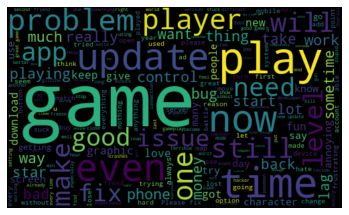

In [ ]:
# Word cloud visualization.
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in GameViolation['content']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()